In [2]:
# loading data set
import pandas as pd

df = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [3]:
#exploring data set to understand chareacteristics.

#size of data set
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (15786, 15)


In [4]:
#summary of the dataset
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15786 entries, 0 to 15785
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       15786 non-null  int64 
 1   recipe_number    15786 non-null  int64 
 2   recipe_code      15786 non-null  int64 
 3   recipe_name      15786 non-null  object
 4   comment_id       15786 non-null  object
 5   user_id          15786 non-null  object
 6   user_name        15786 non-null  object
 7   user_reputation  15786 non-null  int64 
 8   created_at       15786 non-null  int64 
 9   reply_count      15786 non-null  int64 
 10  thumbs_up        15786 non-null  int64 
 11  thumbs_down      15786 non-null  int64 
 12  stars            15786 non-null  int64 
 13  best_score       15786 non-null  int64 
 14  text             15784 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.8+ MB


In [5]:
# statistical summary pf dataset

print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,15786.000000,15786.000000,15786.000000,15786.000000,1.578600e+04,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000
mean,130.730647,30.925884,19863.824655,2.031610,1.623604e+09,0.013683,0.951983,0.478018,4.302040,147.984923
std,121.851486,23.645633,17122.828057,9.419466,5.153842e+06,0.134380,3.822823,3.163969,1.537986,134.854452
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,10.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,99.000000,26.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,163.000000,50.000000,32480.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,80.000000,100276.000000,510.000000,1.665687e+09,3.000000,80.000000,122.000000,5.000000,946.000000


In [6]:
# Investigating the distribution of the 'stars' column
print("\nDistribution of Stars:")
print(df['stars'].value_counts())


Distribution of Stars:
stars
5    12106
0     1462
4     1389
3      402
1      234
2      193
Name: count, dtype: int64


DATA CLEANING/PREPROCESSING

In [8]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64


In [9]:
# Drop rows with missing text data
df = df.dropna(subset=['text'])

# Convert Unix timestamp to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15784 entries, 0 to 15785
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       15784 non-null  int64         
 1   recipe_number    15784 non-null  int64         
 2   recipe_code      15784 non-null  int64         
 3   recipe_name      15784 non-null  object        
 4   comment_id       15784 non-null  object        
 5   user_id          15784 non-null  object        
 6   user_name        15784 non-null  object        
 7   user_reputation  15784 non-null  int64         
 8   created_at       15784 non-null  datetime64[ns]
 9   reply_count      15784 non-null  int64         
 10  thumbs_up        15784 non-null  int64         
 11  thumbs_down      15784 non-null  int64         
 12  stars            15784 non-null  int64         
 13  best_score       15784 non-null  int64         
 14  text             15784 non-null  object    

<ipython-input-9-fd8fe9a922f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'], unit='s')


<ipython-input-10-5358a43910f5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, ax=axs[0, 0], palette='viridis')
<ipython-input-10-5358a43910f5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='thumbs_up', data=df, ax=axs[0, 1], palette='Blues')
<ipython-input-10-5358a43910f5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stars', y='thumbs_down', data=df, ax=axs[1, 0], palette='Reds')
<ipython-input-10-5358a43910f5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

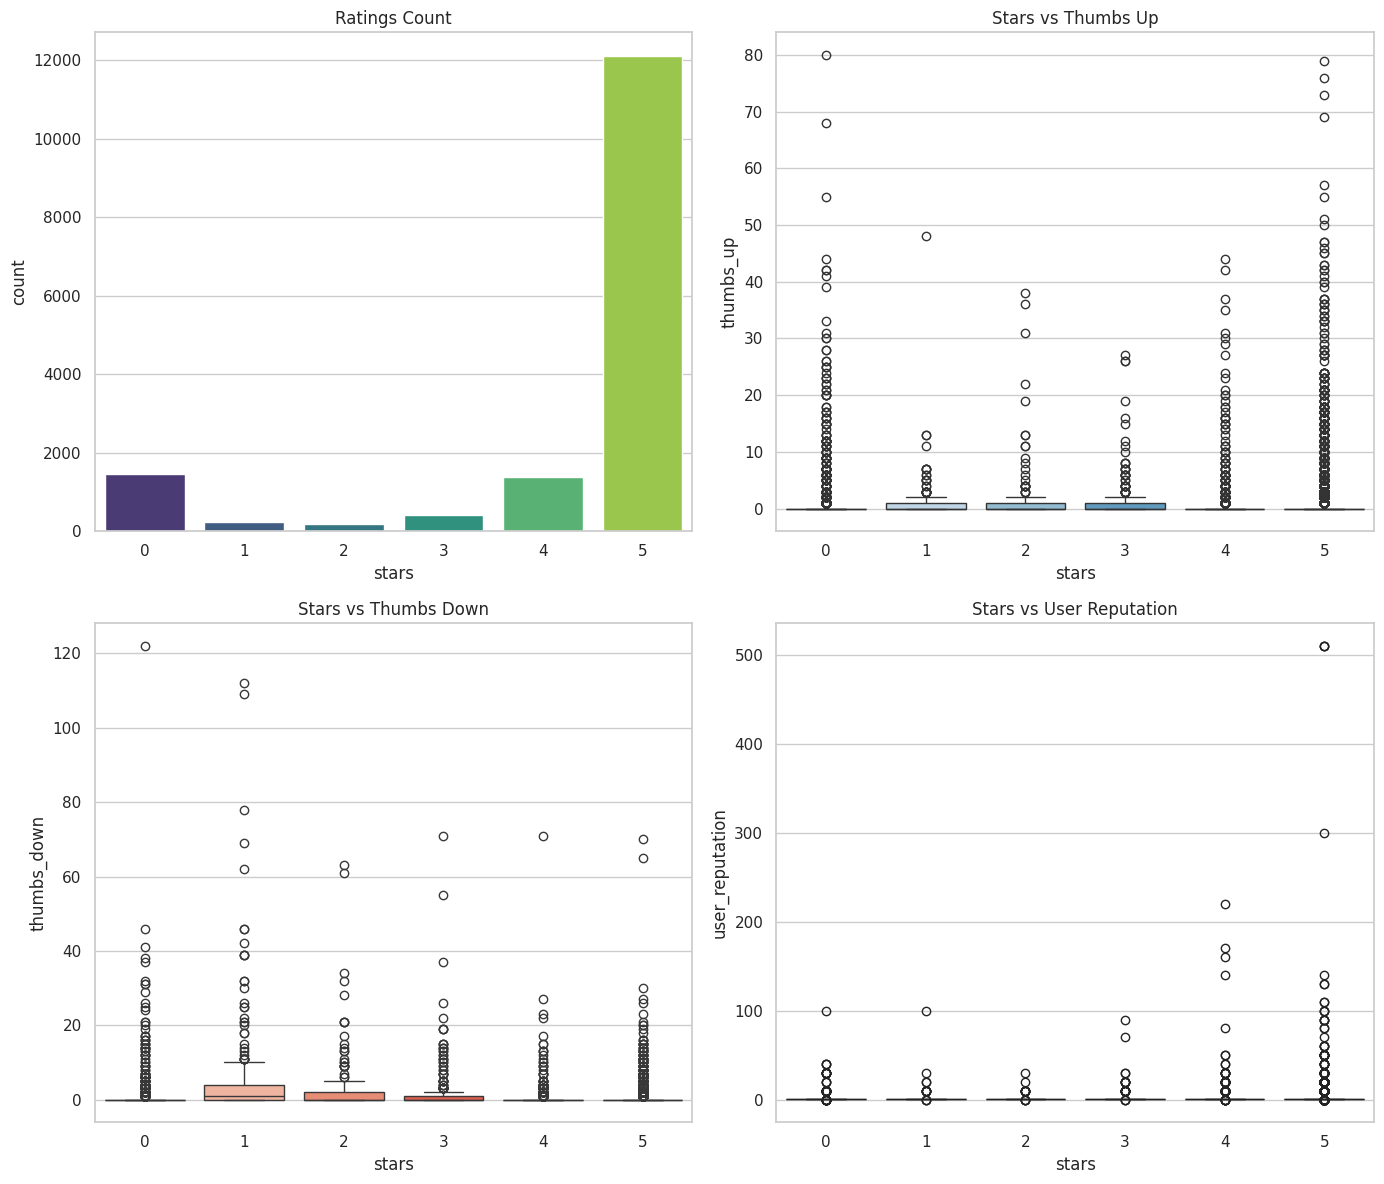

In [10]:
# Basic Visualization of the data distribution of different features.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Ratings Distribution
sns.countplot(x='stars', data=df, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Ratings Count')

# Stars vs Thumbs Up
sns.boxplot(x='stars', y='thumbs_up', data=df, ax=axs[0, 1], palette='Blues')
axs[0, 1].set_title('Stars vs Thumbs Up')

# Stars vs Thumbs Down
sns.boxplot(x='stars', y='thumbs_down', data=df, ax=axs[1, 0], palette='Reds')
axs[1, 0].set_title('Stars vs Thumbs Down')

# Stars vs User Reputation
sns.boxplot(x='stars', y='user_reputation', data=df, ax=axs[1, 1], palette='Greens')
axs[1, 1].set_title('Stars vs User Reputation')
plt.tight_layout()
plt.show()

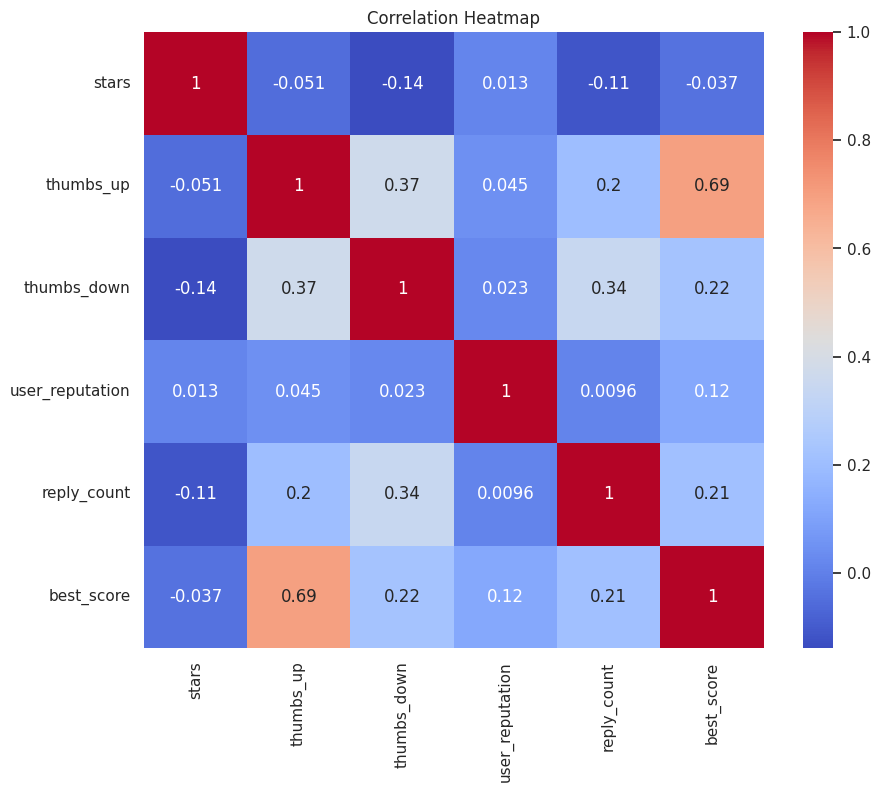

In [11]:
# Correlation heatmap between different variables.

# Calculate correlation
correlation_matrix = df[['stars', 'thumbs_up', 'thumbs_down', 'user_reputation', 'reply_count', 'best_score']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


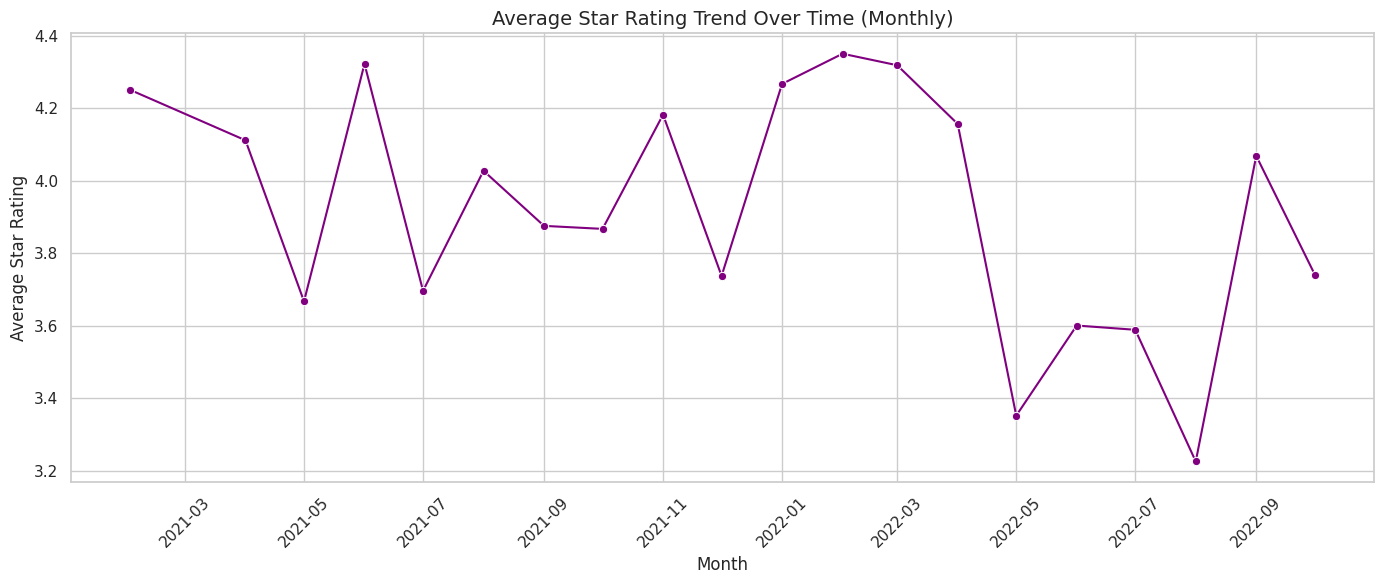

In [12]:
# Create a 'month' column
df['month'] = df['created_at'].dt.to_period('M').astype(str)

# Group by month and calculate average star rating
monthly_avg = df.groupby('month')['stars'].mean().reset_index()

# Sort by month to ensure correct order in the plot
monthly_avg['month'] = pd.to_datetime(monthly_avg['month'])
monthly_avg = monthly_avg.sort_values('month')

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='month', y='stars', marker='o', color='purple')
plt.title('Average Star Rating Trend Over Time (Monthly)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


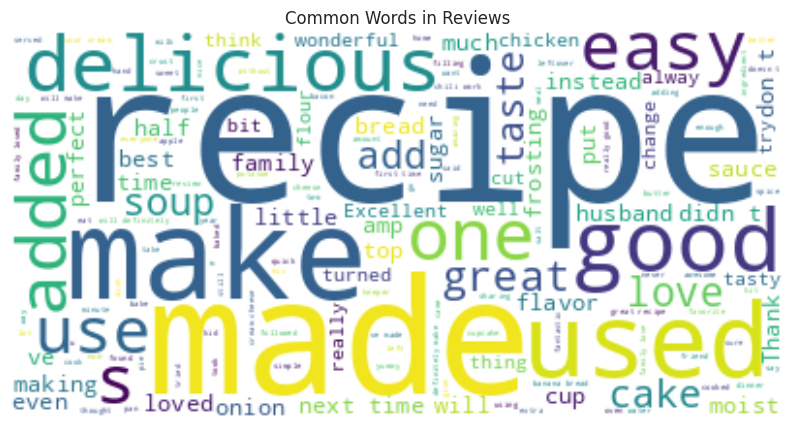

In [13]:
#basic wordloud to visualise the words in review text

from wordcloud import WordCloud, STOPWORDS

# Combine all review text
text_data = " ".join(review for review in df['text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Reviews')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


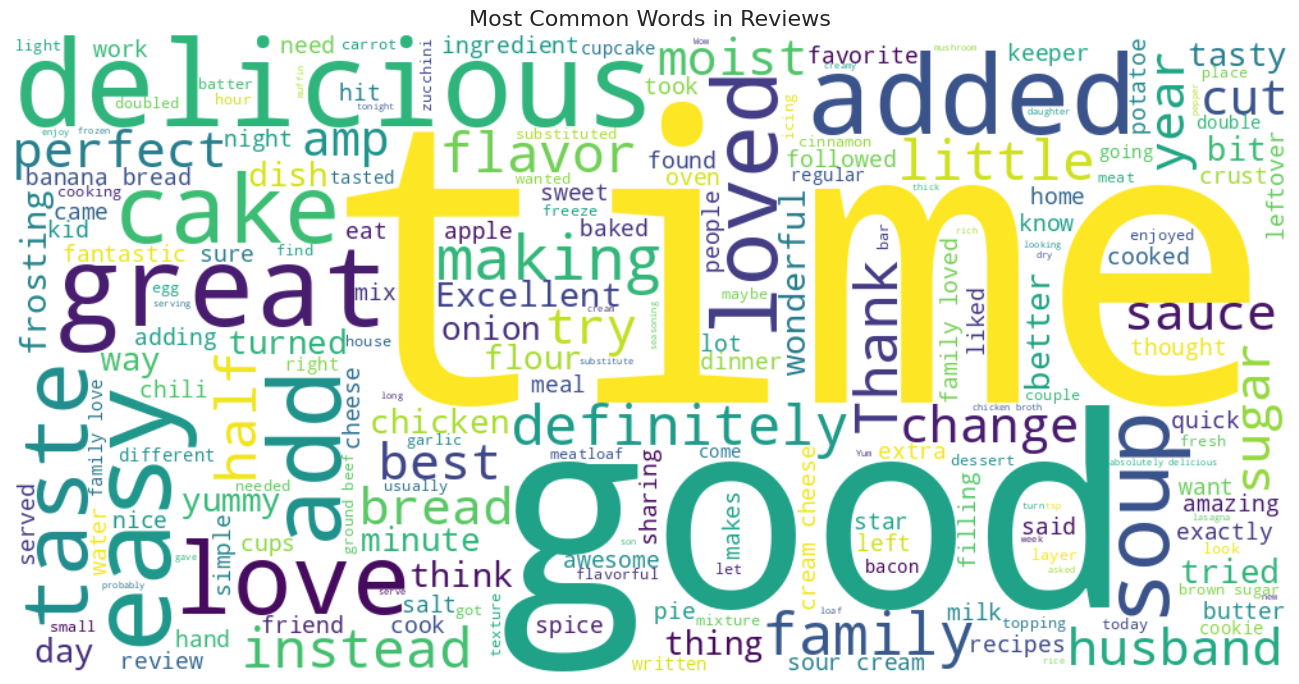

In [14]:

# WordCloud with Extended Stopwords
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords as nltk_stopwords
from wordcloud import WordCloud, STOPWORDS

#Load spaCy model and NLTK stopwords
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

# Combine stopword sets
combined_stopwords = set(STOPWORDS)
combined_stopwords |= set(nltk_stopwords.words('english'))
combined_stopwords |= nlp.Defaults.stop_words

# Add domain-specific stopwords
combined_stopwords.update([
    'recipe', 'make', 'use', 'used', 'made', 'bake', 'baking',
    'cup', 'pan', 'will', 'would', 'one', 'get', 'also', 'really',
    'did', 'didn’t', 'does', 'doesn’t', 'could', 'should', 'might'
])

# Combine all review text (assuming df['text'] exists)
text_data = " ".join(str(review) for review in df['text'])

# Generate Word Cloud
wordcloud = WordCloud(
    stopwords=combined_stopwords,
    background_color='white',
    max_words=200,
    width=1000,
    height=500
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews", fontsize=16)
plt.tight_layout()
plt.show()


MODEL BUILDING

In [15]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
  if isinstance(text, str):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    return ' '.join(tokens)
  else:
    return ''

df['cleaned_text'] = df['text'].apply(clean_text)
display(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"I tweaked it a little, removed onions because ...",tweaked little removed onions onion haters hou...
1,Bush used to have a white chili bean and it ma...,bush used white chili bean made recipe super s...
2,I have a very complicated white chicken chili ...,complicated white chicken chili recipe made ye...
3,"In your introduction, you mentioned cream chee...",introduction mentioned cream cheese none liste...
4,Wonderful! I made this for a &#34;Chili/Stew&#...,wonderful made 34chilistew34 night dinner chur...


In [16]:
#vectorizing the data using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
display(df_tfidf.head())

,10,10 minutes,10 stars,10 years,100,11,112,112 cups,12,12 cup,...,yummy,yummy easy,yummy recipe,yummy used,zest,zesty,zing,zip,zucchini,zucchini garden
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#split data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_tfidf, df['stars'], test_size=0.2, stratify=df['stars'], random_state=42
)

In [18]:
# Training a Logistic Regression model using the training data

from sklearn.linear_model import LogisticRegression

# Initiate  a LogisticRegression object with max_iter set to a higher value
logreg_model = LogisticRegression(max_iter=1000)

# Fit the logistic regression model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# testing and evaluating the trained logistic regression model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict sentiment labels for the test data
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")



Accuracy: 0.7840
Precision: 0.7254
Recall: 0.7840
F1-score: 0.7173


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Get unique values from y_test to use as labels
labels = sorted(y_test.unique())

# Generate the confusion matrix with the correct labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

print(conf_matrix)

              precision    recall  f1-score   support

           0       0.56      0.12      0.20       292
           1       0.86      0.13      0.22        47
           2       0.00      0.00      0.00        39
           3       0.29      0.05      0.09        80
           4       0.48      0.11      0.18       278
           5       0.80      0.99      0.88      2421

    accuracy                           0.78      3157
   macro avg       0.50      0.23      0.26      3157
weighted avg       0.73      0.78      0.72      3157

[[  36    0    0    2    4  250]
 [   4    6    0    1    3   33]
 [   2    1    0    4    9   23]
 [   6    0    0    4    8   62]
 [   3    0    0    3   30  242]
 [  13    0    0    0    9 2399]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Analyze the performance based on the evaluation metrics
print("\nAnalysis of the model's performance:")
if accuracy > 0.7:
  print("The model is performing reasonably well overall.")
else:
  print("The model is not performing well overall.")


Analysis of the model's performance:
The model is performing reasonably well overall.
